Bag of Words (BOW) is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set.

In [5]:
import nltk  
import numpy as np  
import random  
import string

import bs4 as bs  
import urllib.request  
import re  
import pandas as pd

import matplotlib.pyplot as plt     #For Visualisation
%matplotlib inline
import seaborn as sns               #For better Visualisation

In [6]:
#xls = pd.ExcelFile("Comments (2).xlsx")
df = pd.read_excel('Comments (2).xlsx')

article_text = ''

for para in df['Comment']:  
    article_text += str(para)

In [ ]:
print(article_text)

In [8]:
corpus = nltk.sent_tokenize(article_text)

In [ ]:
corpus

In [10]:
for i in range(len(corpus)):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i])

In [11]:
print(len(corpus))

3273


In [12]:
print(corpus[0])

djfjkdfjkjkffdk editedfaith has exhibited enthusiasm in taking on the project at hand 


In [13]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [ ]:
print(wordfreq)

In [15]:
df_wordfreq = pd.DataFrame(wordfreq.items(), columns=['Word', 'Freq'])

In [16]:
df_wordfreq = df_wordfreq.sort_values('Freq', ascending=False)

df_wordfreq

,Word,Freq
8,the,4915
63,to,4415
36,and,3463
31,he,1907
20,of,1892
...,...,...
3644,vanilla,1
3645,plain,1
3648,broader,1
3649,suiting,1


In [17]:
from nltk.probability import FreqDist
fdist = FreqDist(wordfreq)
print(fdist)

<FreqDist with 6261 samples and 102404 outcomes>


In [18]:
fdist.most_common(5)

[('the', 4915), ('to', 4415), ('and', 3463), ('he', 1907), ('of', 1892)]

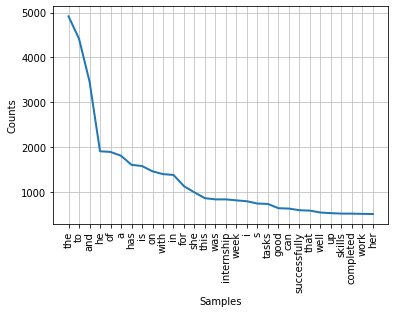

In [19]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

Sentiment Analysis of the comments

 Using the ‘isnull().sum()’ method we could easily find the total number of missing values in the dataset.

Remove HTML Tags

In [20]:
from bs4 import BeautifulSoup       #For Text Parsing

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
df_wordfreq['review'] = df_wordfreq['Word'].apply(strip_html)
data=df_wordfreq.drop('Word',axis=1)
data.head()

,Freq,review
8,4915,the
63,4415,to
36,3463,and
31,1907,he
20,1892,of


remove the punctuation marks and then remove the words which do not add a sentiment to the text

In [21]:
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
data['review'] = data['review'].apply(punc_clean)
data.head(9)

,Freq,review
8,4915,the
63,4415,to
36,3463,and
31,1907,he
20,1892,of
67,1807,a
2,1604,has
208,1578,is
7,1460,on


In [22]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
data['review'] = data['review'].apply(remove_stopword)

In [23]:
data

,Freq,review
8,4915,
63,4415,
36,3463,
31,1907,
20,1892,
...,...,...
3644,1,vanilla
3645,1,plain
3648,1,broader
3649,1,suiting


In [24]:
#Lexicon Normalization
#performing stemming and Lemmatization

def lem(text):
    
    from nltk.stem.wordnet import WordNetLemmatizer
    lem = WordNetLemmatizer()

    word1 = [w for w in lem.lemmatize(text)]

    '''from nltk.stem.porter import PorterStemmer
    stem = PorterStemmer()

    word2 = [w for w in stem.stem(word1)]'''

    return ' '.join(word1)

data['review'] = data['review'].apply(lem)

In [25]:
data

,Freq,review
8,4915,
63,4415,
36,3463,
31,1907,
20,1892,
...,...,...
3644,1,v a n i l l a
3645,1,p l a i n
3648,1,b r o a d e r
3649,1,s u i t i n g


In [26]:
def stem(text):
    
    from nltk.stem.porter import PorterStemmer
    stem = PorterStemmer()

    word1 = [w for w in stem.stem(text)]

    return ' '.join(word1)

data['review'] = data['review'].apply(stem)

In [27]:
data

,Freq,review
8,4915,
63,4415,
36,3463,
31,1907,
20,1892,
...,...,...
3644,1,v a n i l l a
3645,1,p l a i n
3648,1,b r o a d e r
3649,1,s u i t i n g


In [28]:
# POS tagging to determine word is a noun, verb etc

data['pos_tag'] = nltk.pos_tag(data['review'])

In [29]:
data

,Freq,review,pos_tag
8,4915,,"(, JJ)"
63,4415,,"(, NNP)"
36,3463,,"(, NNP)"
31,1907,,"(, NNP)"
20,1892,,"(, NNP)"
...,...,...,...
3644,1,v a n i l l a,"(v a n i l l a, NN)"
3645,1,p l a i n,"(p l a i n, NN)"
3648,1,b r o a d e r,"(b r o a d e r, NN)"
3649,1,s u i t i n g,"(s u i t i n g, NN)"


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6261 entries, 8 to 6260
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Freq     6261 non-null   int64 
 1   review   6261 non-null   object
 2   pos_tag  6261 non-null   object
dtypes: int64(1), object(2)
memory usage: 195.7+ KB


In [31]:
# drop rows rendered empty because of stop words

nan_value = float("NaN")

data.replace("", nan_value, inplace=True)

data.dropna(subset = ["review"], inplace=True)

In [32]:
data

,Freq,review,pos_tag
60,834,i n t e r n s h i p,"(i n t e r n s h i p, NN)"
75,812,w e e k,"(w e e k, NN)"
193,732,t a s k,"(t a s k, NN)"
93,637,g o o d,"(g o o d, NN)"
720,592,s u c c e s s f u l l i,(s u c c e s s f u l l i...
...,...,...,...
3644,1,v a n i l l a,"(v a n i l l a, NN)"
3645,1,p l a i n,"(p l a i n, NN)"
3648,1,b r o a d e r,"(b r o a d e r, NN)"
3649,1,s u i t i n g,"(s u i t i n g, NN)"


assign each word in every review with a sentiment score

In [33]:
data['review']

60              i   n   t   e   r   n   s   h   i   p
75                                      w   e   e   k
193                                     t   a   s   k
93                                      g   o   o   d
720     s   u   c   c   e   s   s   f   u   l   l   i
                            ...                      
3644                        v   a   n   i   l   l   a
3645                                p   l   a   i   n
3648                        b   r   o   a   d   e   r
3649                        s   u   i   t   i   n   g
6260              t   a   s   k   s   t   h   e   r  
Name: review, Length: 6125, dtype: object

In [34]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data["sentiments"] = data["review"].apply(lambda x: sid.polarity_scores(x))
data = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)

In [36]:
data.to_csv('out.csv')